# CART(Classification and Regression Tree) 

In [1]:
# tahmin başarısı açısından yarışmalarda en başarılı yüzdeyi bize verir 
# randomforestın temelleri dayanmaktadır .

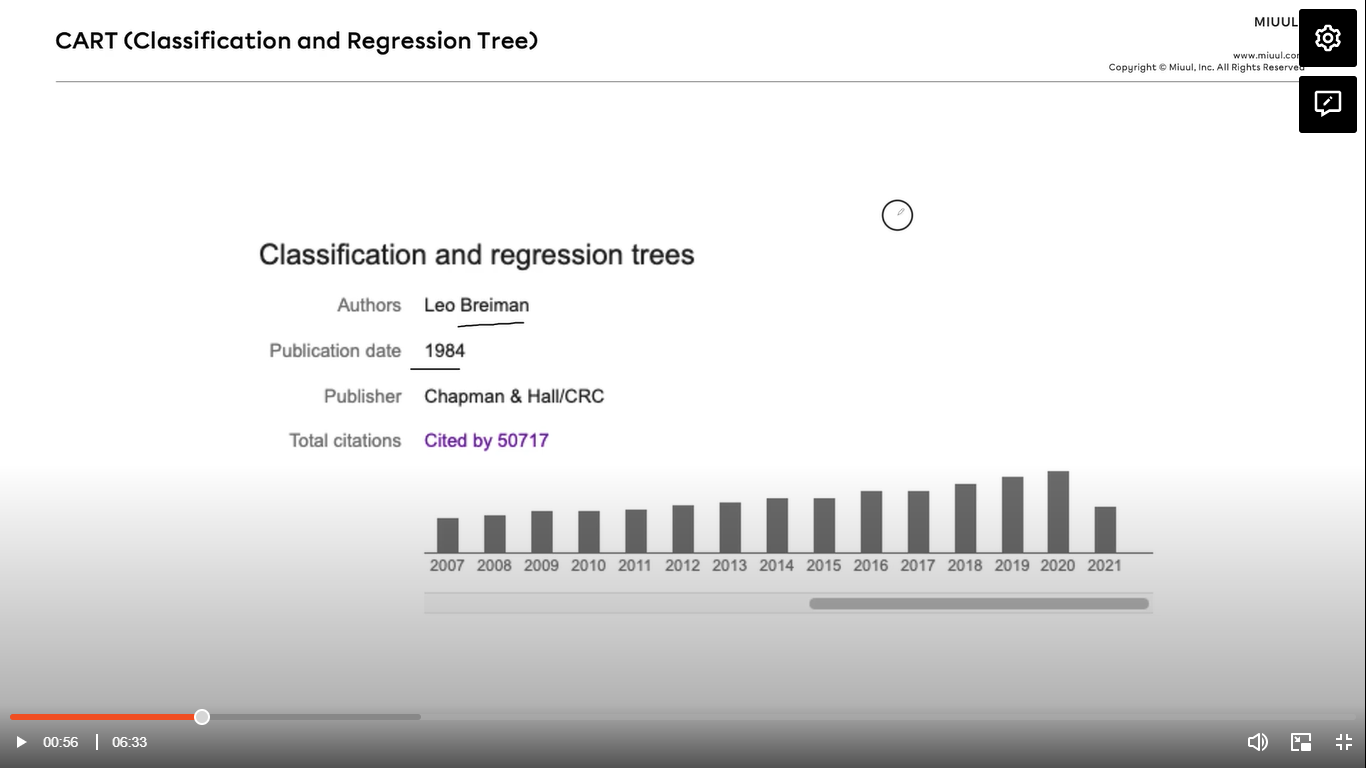

Amaç : 
* amaç veri seti içerisindeki karmaşık yapıları basit karar yapılarına göre dönüştürmektedir 
* heterojen veri setleri belirlenmiş bir hedef değişkene göre homojen alt gruplara ayrılır 

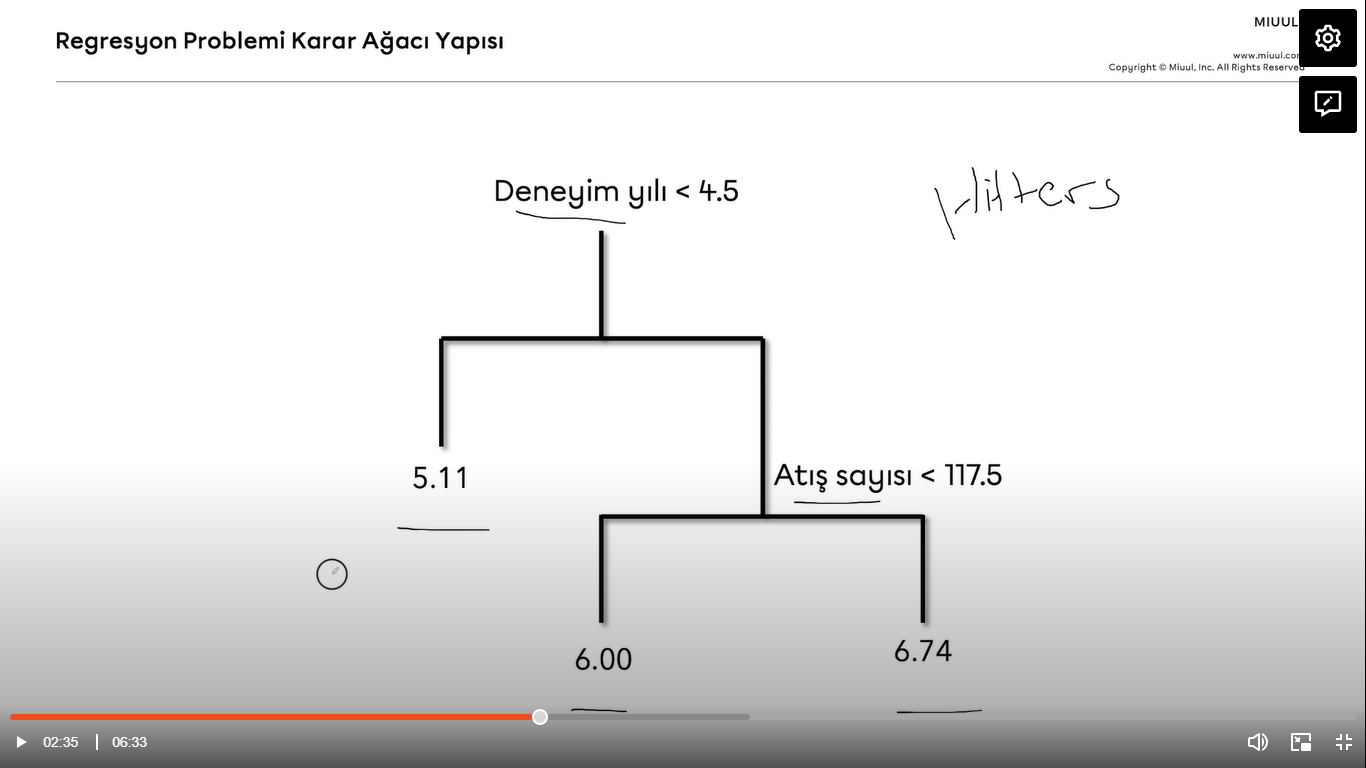

* deneyim yılı ve maaş değişkeni ve atış sayısı  
* bağımlı değişken : maaş 
* bağımsız değişken : deneyim yılı ve atış sayısı 
* bağımsız değişkeni bölen noktalara iç düğüm(bölüm) noktaları denir 

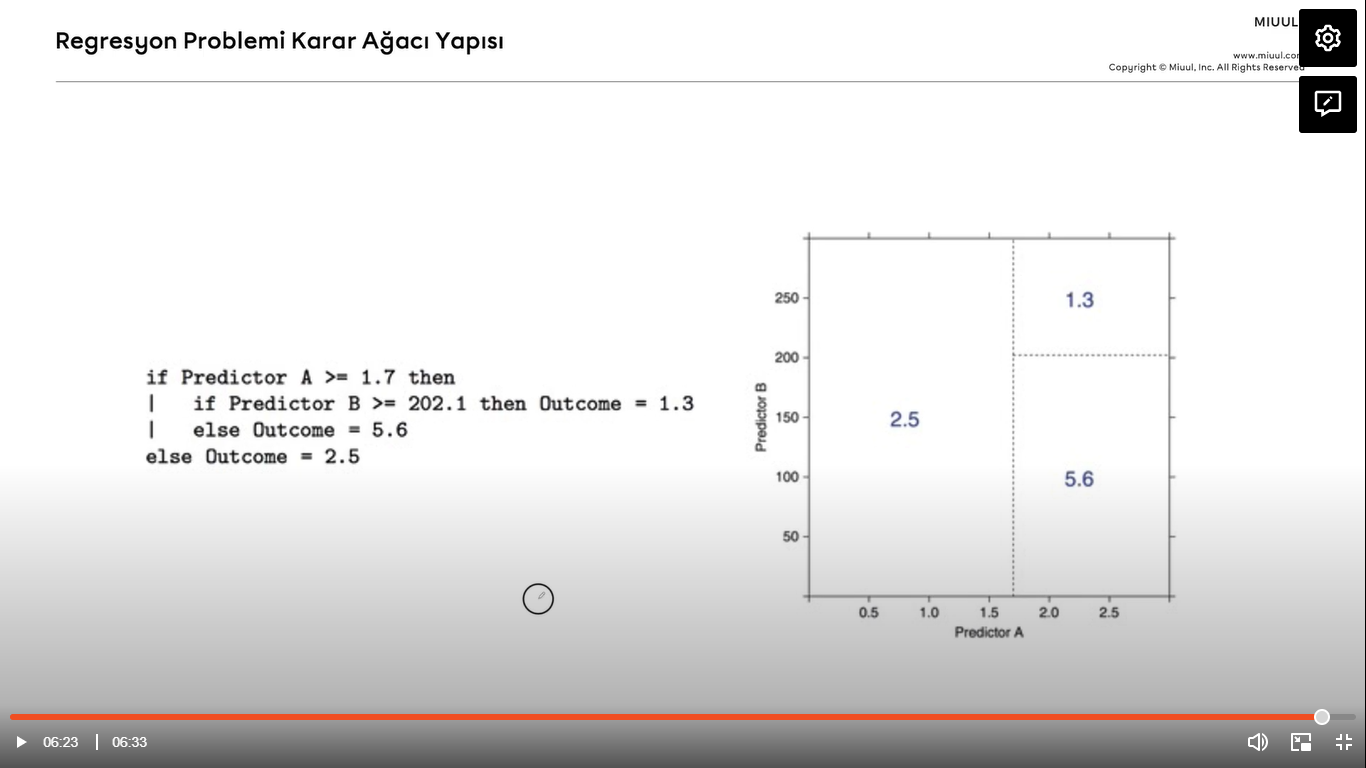

önemli olan karar noktalarını karar verirken neye göre karar verdik ? bu amaclı kullanılır bunu bulmak için

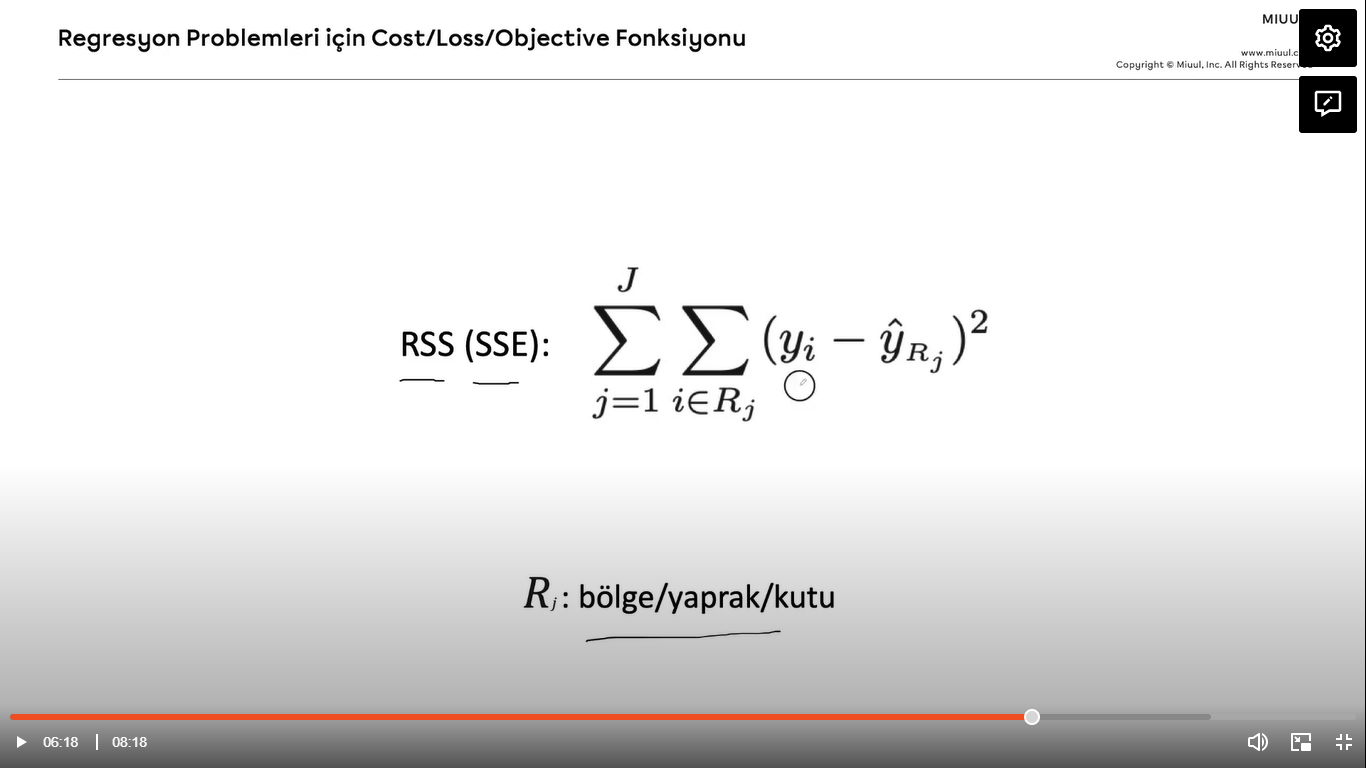

* gerçek değerlerin ortalaması alınır bunlar tahmin sonucu olarak değerlendirilir.Gerçek - tahmin -> ilgili kutunun ortalama değeri . 
* Şöyle ki, Normalde;
“bir” değeri tahmin ederiz ve o değer ile asıl değer arasındaki farkı alırız.
Örneğin 5 tahmin ettim ve değer 4.
4-5 = -1
Ancak, ağaç algoritmalarımızın yaprakları var, yapraklar sadece 1 değer içermiyor, birden fazla değer içerebiliyor. Burada “bir” değer olmadığı için, yaprağın ortalamasını alıyoruz aslında. Benim anladığım bu şekilde.
Çünkü yaprak belirli şartlar sonucunda oluşuyor. Diyor ki;
x < 5, y > 3, x < 2, z > 10 şartlarını sağlayan 4 değer var. e bunların hangisini alacağız? Yaprağın ortalamasını alacağız.

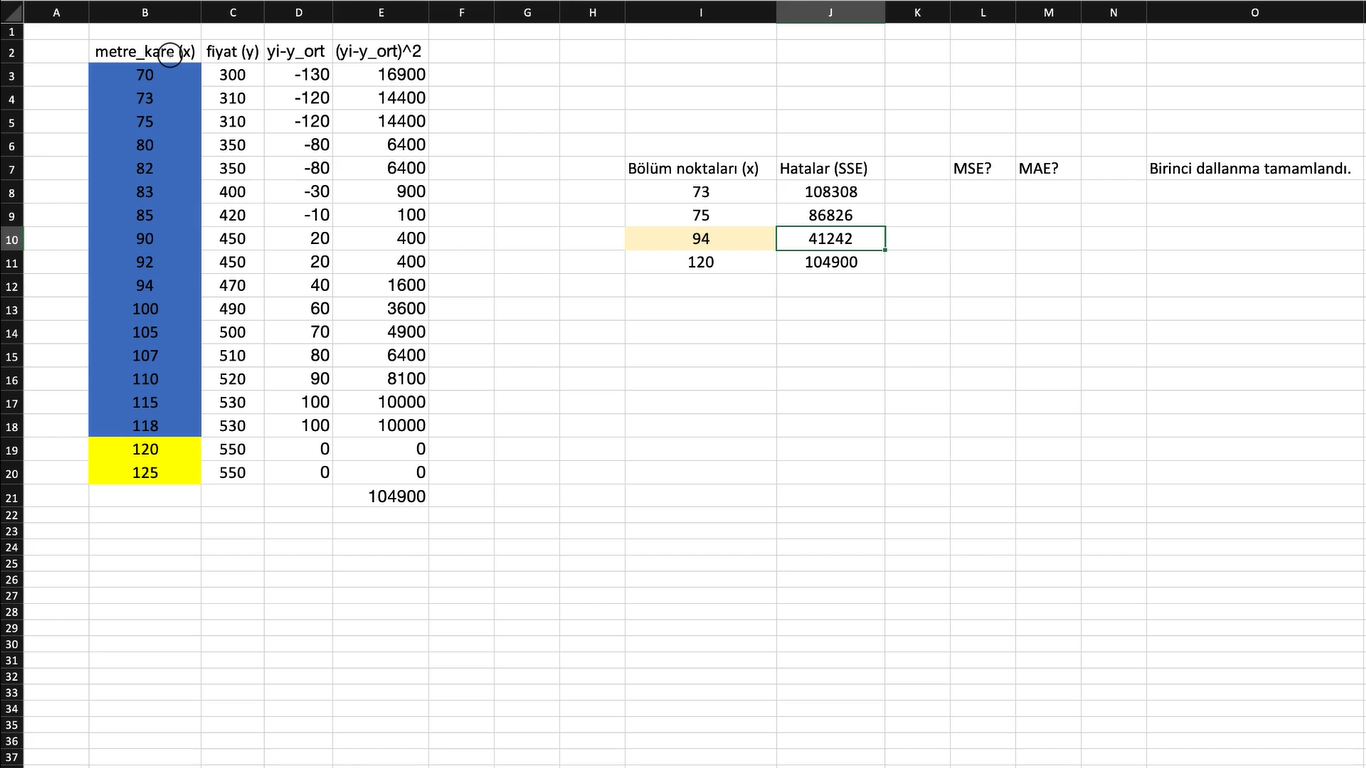

* küçükten büyüğe doğru sırala bölme işlemi yapmadan önce 
* sonra hepsini dene ve ona göre bölme işlemi yap 
* sonra aralarından en iyileri seç 
* en iyiler arasında en düşük sayıyı seç hatalar olarak en düşük olanı

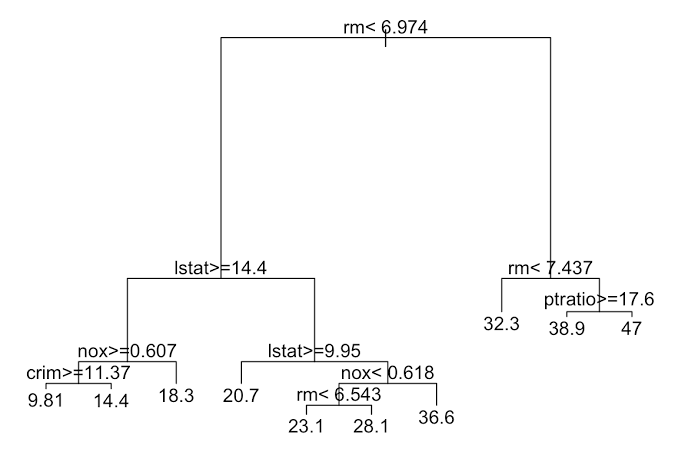

* SSE ortalaması MSE yi verir  
* MAE -> fark işleminden sonra mutlağını alırız sonra ortalamasını alırız 

* son 2 değer mi alınıp ortalama alınır 3 mü 

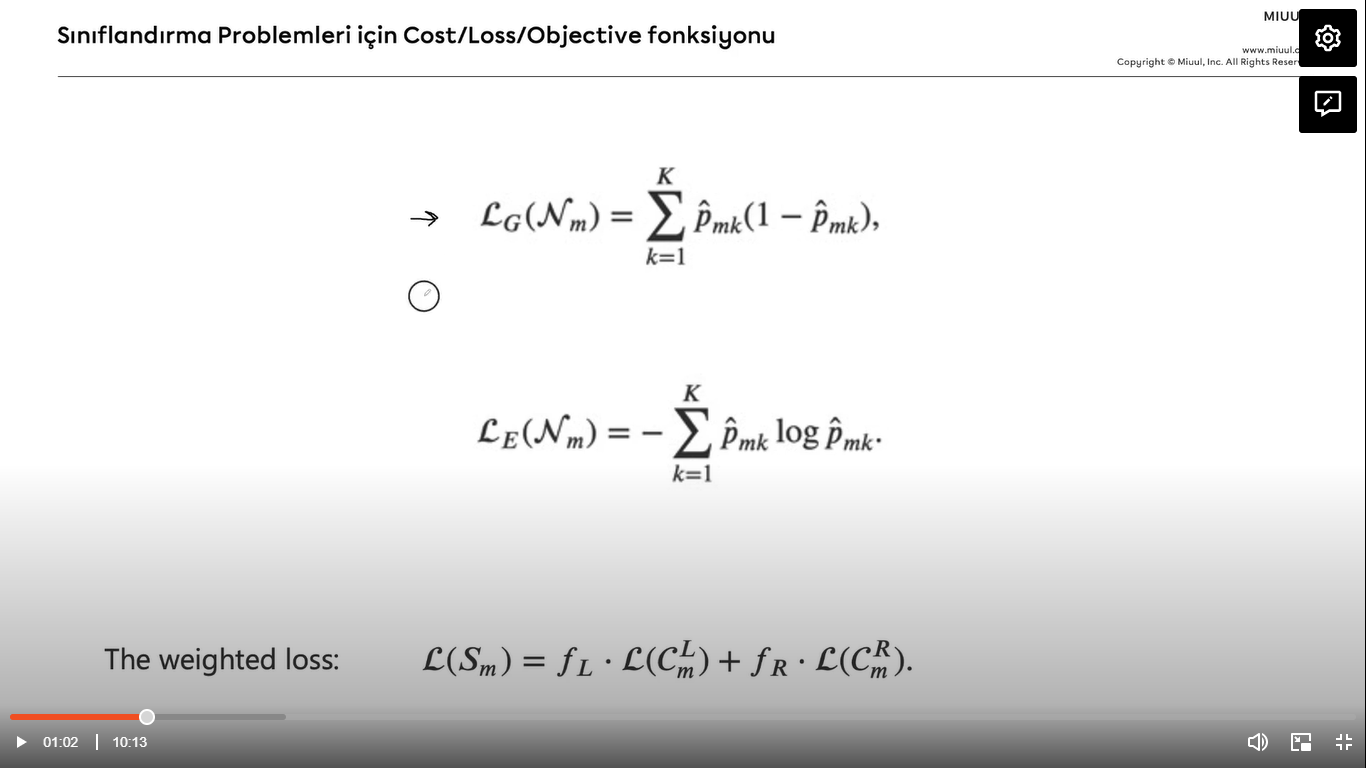

* saflık ölçüleridir , ne kadar düşük o kadar iyidir(çeşitlilik)

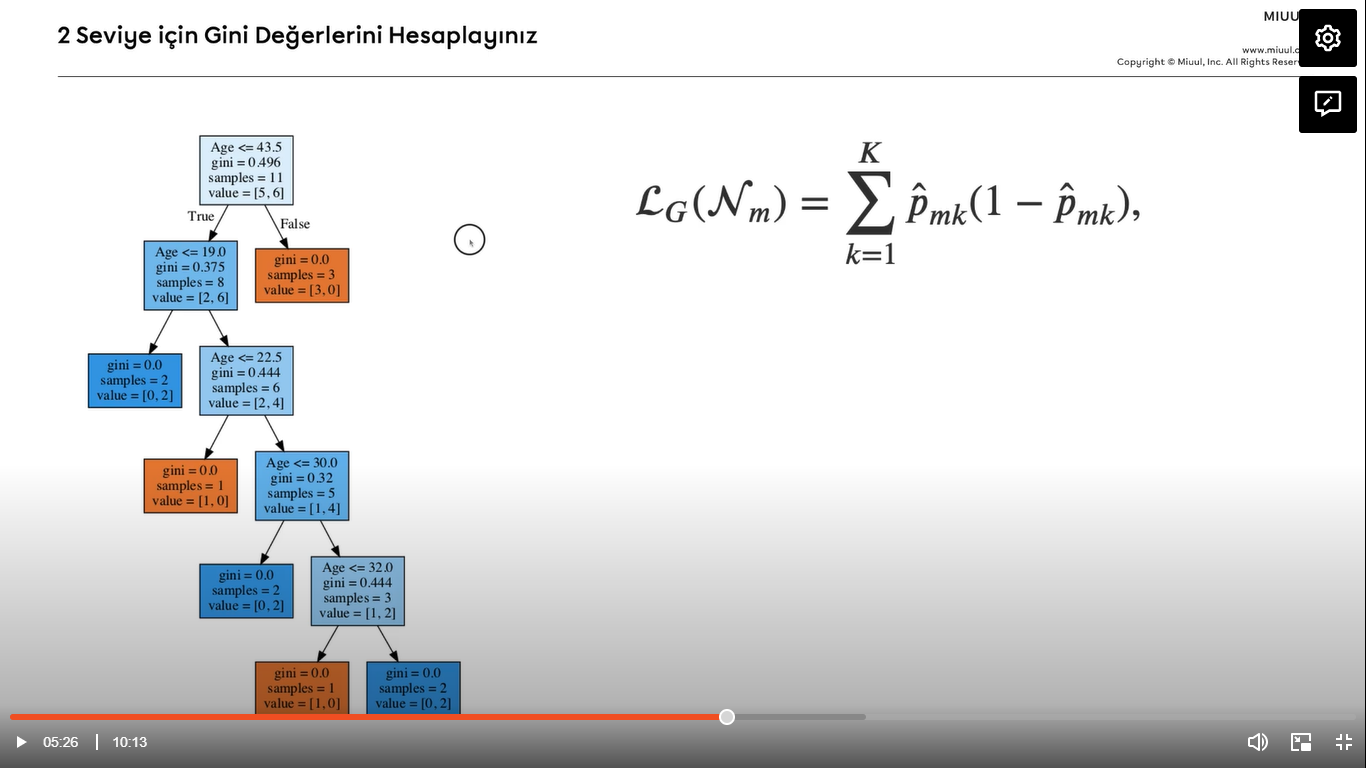

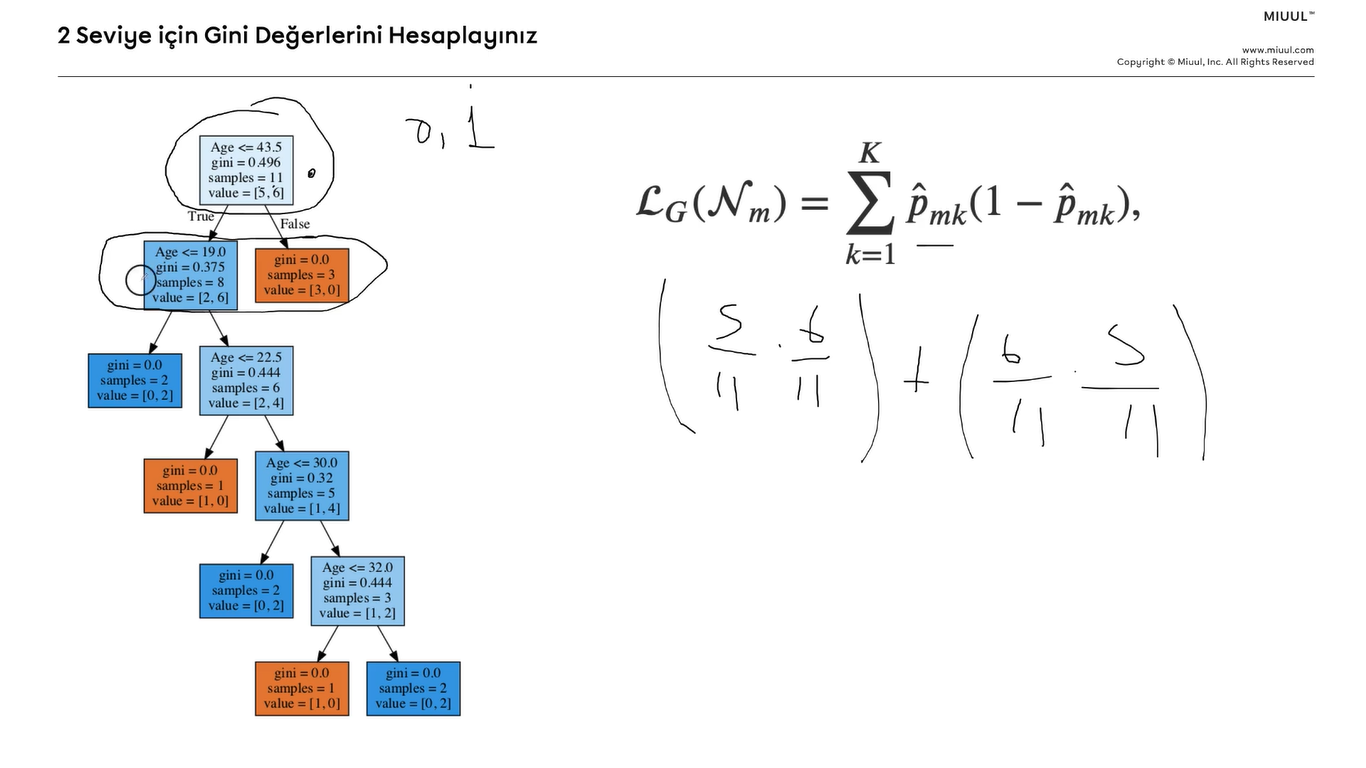

Kutunun saflık ölçüsü(homojenliğidir)

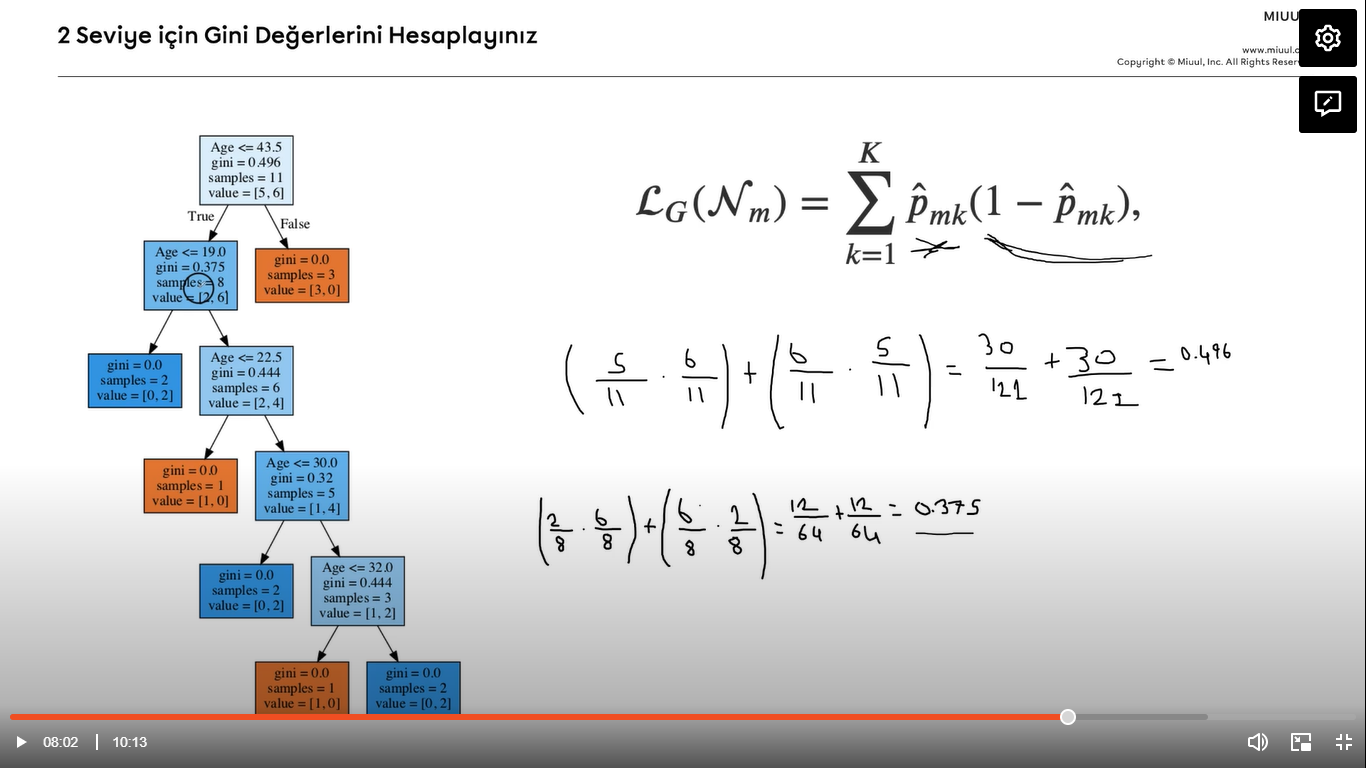

Ağırlıklar WG

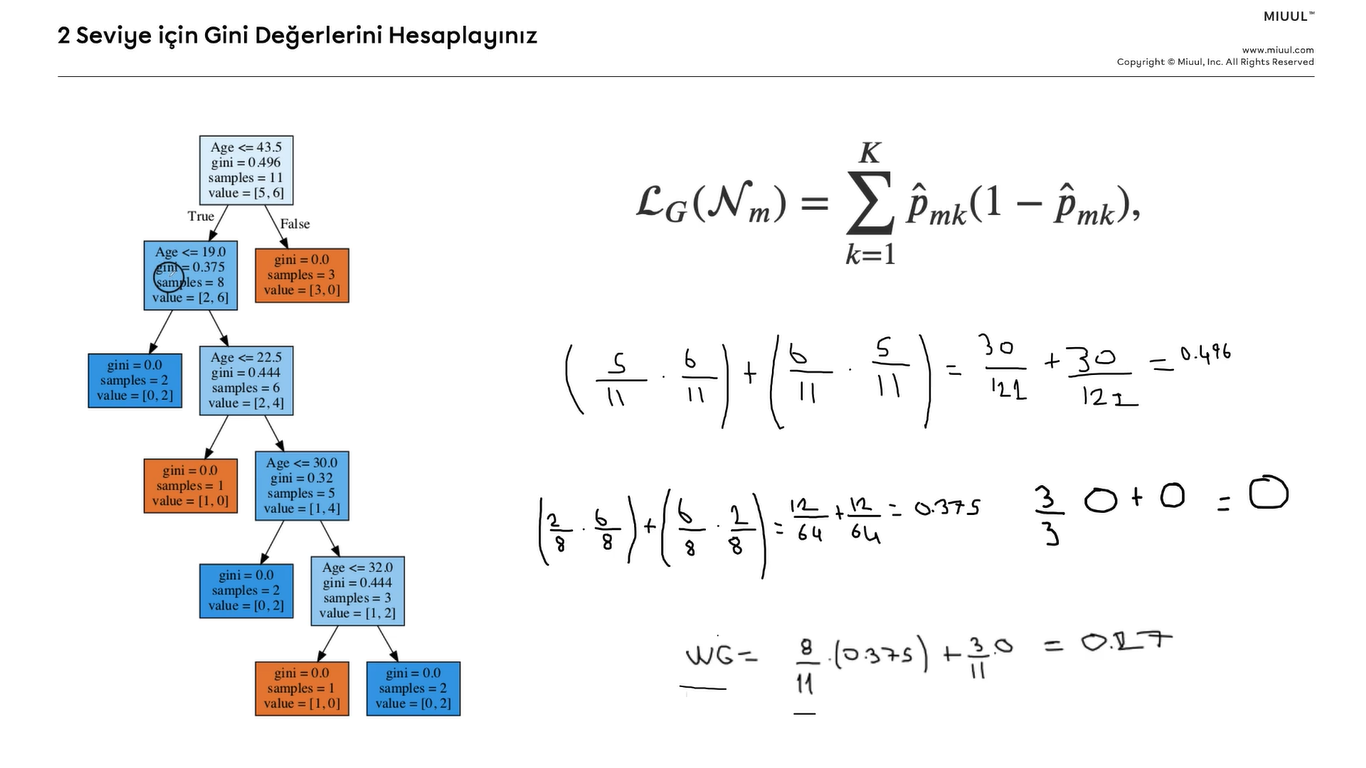

#### Uygulama 

* 1. Exploratory Data Analysis 
* 2. Data Preprocessing & Feature Engineering 
* 3. Modelling Using CART 
* 4. Hyperparameter Optimization with GridSearchCV 
* 5. Final Model 
* 6. Feature Importance 
* 7. Analyzing Model Complexity with Learning Curves(BONUS)  
* 8. Visualizing the Decision Rules 
* 9. Extracting Python/SQL/Excel Codes of Decision Rules 
* 10.Extracting using Python codes 
* 11.Prediction using Python codes 
* 12.Saving and Loading Models

In [2]:
!pip install pydotplus

ERROR: Could not find a version that satisfies the requirement pydotplus (from versions: none)
ERROR: No matching distribution found for pydotplus


In [3]:
!pip install skompiler

ERROR: Could not find a version that satisfies the requirement skompiler (from versions: none)
ERROR: No matching distribution found for skompiler


In [4]:
!pip install astor

ERROR: Could not find a version that satisfies the requirement astor (from versions: none)
ERROR: No matching distribution found for astor


In [5]:
!pip install joblib

In [8]:
!pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=828eb93c966825cfc929c93b9964639ab5f7c90a6e1dc71619847b4eb38bf578
  Stored in directory: c:\users\tolga\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus


In [12]:
!pip install pip install matplotlib


In [16]:
!pip install skompiler

  Created wheel for skompiler: filename=SKompiler-0.6-py3-none-any.whl size=54286 sha256=1f8263fdd0197af6708b80d6fda9ec97137c5c7320fc774e651f21ac7cb36a8c
  Stored in directory: c:\users\tolga\appdata\local\pip\cache\wheels\fd\94\33\2a75ac13109534426a0ace0cde02f41aef30a846f1facd4110
Successfully built skompiler


In [1]:
import warnings 
import joblib 
import pydotplus 
import numpy as np 
import pandas as pd  
import seaborn as sns  
from  matplotlib import pyplot as plt 
from sklearn.tree import DecisionTreeClassifier , export_graphviz , export_text 
from sklearn.metrics import classification_report, roc_auc_score 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve 
from skompiler import skompile

In [2]:
pd.set_option('display.max_columns',None) 
warnings.simplefilter(action='ignore',category=Warning) # bazı hataları görmezden gelmek için warning kullandık 

#### 1.Exploratory Data Analysis

In [ ]:
#önceki bölümlerde yapıldı

#### 2. Data Preprocessing & Feature Engineering

In [ ]:
# önceki bölümlerde yapıldı 

#### 3. Modelling using CART

In [3]:
df = pd.read_csv('datasets/diabetes.csv')

In [4]:
y = df["Outcome"] 
X = df.drop(["Outcome"],axis=1) 
cart_model = DecisionTreeClassifier(random_state=1).fit(X,y)

In [5]:
# Confusion matrix için y_pred : 

y_pred = cart_model.predict(X)

In [6]:
# AUC için y_prob:

y_prob = cart_model.predict_proba(X)[:,1]

In [7]:
from sklearn.metrics import classification_report

In [8]:
# Confusion matrix

print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       268

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768



In [9]:
# bu kadar iyi olamaz rastlantısal bir hata olması lazım 

In [10]:
# AUC 

roc_auc_score(y,y_prob)

1.0

In [11]:
# gerçekten başarılı mıyım yoksa overfit mi oldu 
# daha başarılı nasıl yaparım "holdout" and "crossvalidate" yapılır -> model doğrulanır

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# train setine yönelik model kuralım 

cart_model = DecisionTreeClassifier(random_state=17).fit(X_train,y_train)

In [15]:
cart_model

DecisionTreeClassifier(random_state=17)

In [16]:
# train hatası

y_pred = cart_model.predict(X_train) 
y_prob = cart_model.predict_proba(X_train)[:,1] 
print(classification_report(y_train,y_pred)) 
roc_auc_score(y_train,y_prob)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       1.00      1.00      1.00       187

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



1.0

In [17]:
# test hatası 

y_pred = cart_model.predict(X_test) 
y_prob = cart_model.predict_proba(X_test)[:,1] 
print(classification_report(y_test,y_pred)) 
roc_auc_score(y_test,y_prob)

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       150
           1       0.58      0.57      0.58        81

    accuracy                           0.71       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.71      0.70       231



0.6739506172839506

 sonuç olarak model testinde değer düştü yani model göremediği veri setindeki başarısı düşük
 * train setinde çok iyi fakat test setinde kötü "overfit" var 
 * 30 - 70 aldık 67 çıkarken başarısı değiştirince başarı oranı 65 e düştü 
 * X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

Bundan dolayı 10 katlı çapraz doğrulama yapmam lazım

#### Cv ile Başarı Değerlendirme

In [18]:
cart_model = DecisionTreeClassifier(random_state=17).fit(X,y)

In [19]:
# yukarıdakini görmezden geliyor çünkü kendisi tekrardan fit ediyor 

cv_results = cross_validate(cart_model, 
                           X,y, 
                           cv=10,
                           scoring=["accuracy","f1","roc_auc"])

In [20]:
cv_results

{'fit_time': array([0.00956368, 0.00801301, 0.00802112, 0.00752902, 0.01096892,
        0.00871444, 0.00861073, 0.00805712, 0.01391387, 0.01014805]),
 'score_time': array([0.01075435, 0.01015592, 0.00859237, 0.00862074, 0.00829816,
        0.0074594 , 0.00713897, 0.00785804, 0.01106   , 0.00668287]),
 'test_accuracy': array([0.67532468, 0.71428571, 0.66233766, 0.5974026 , 0.71428571,
        0.7012987 , 0.81818182, 0.83116883, 0.69736842, 0.73684211]),
 'test_f1': array([0.54545455, 0.54166667, 0.55172414, 0.39215686, 0.54166667,
        0.59649123, 0.73076923, 0.75471698, 0.5106383 , 0.61538462]),
 'test_roc_auc': array([0.64777778, 0.66074074, 0.6462963 , 0.54518519, 0.66074074,
        0.68481481, 0.79185185, 0.81037037, 0.64076923, 0.70769231])}

In [21]:
cv_results['test_accuracy'].mean()

0.7148496240601504

In [22]:
cv_results['test_f1'].mean()

0.5780669232692448

In [23]:
cv_results['test_roc_auc'].mean()

0.6796239316239316

#### 4.Hyperparameter Optimization with GridSearchCV

In [24]:
cart_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 17,
 'splitter': 'best'}

In [25]:
# min_samples_split -> 2 tane kalana kadar bölme işlemi yapıyor,overfitting olabilir ,dışşsal parametre 
# max_deep -> overfitting olmamasını sağlayacağız 
# değer verirken ön tanımlı değerine bakarız max_samples_split : 2 ymiş gibi

In [26]:
cart_params = {'max_depth': range(1,11), 
              "min_samples_split":range(2,20)}

In [27]:
# gridserarchcv 

cart_best_grid = GridSearchCV(cart_model, 
                             cart_params, 
                             cv=5, 
                             n_jobs=1, 
                             verbose=True).fit(X,y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [28]:
# 180 kombinasyonu varmış 

In [29]:
# verbose u 2 yaparsak bize rapor çıkarır 


cart_best_grid = GridSearchCV(cart_model, 
                             cart_params, 
                             cv=5, 
                             n_jobs=1, 
                             verbose=2).fit(X,y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=4; total time=   0.0s
[CV] END ...................max_depth=1, min_s

[CV] END ...................max_depth=2, min_samples_split=4; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=4; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=4; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=4; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=6; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=6; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=6; total time=   0.0s
[CV] END ...................

[CV] END ...................max_depth=3, min_samples_split=7; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_split=7; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_split=7; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_split=8; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_split=8; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_split=8; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_split=8; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_split=8; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_split=9; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_split=9; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_split=9; total time=   0.0s
[CV] END ...................max_depth=3, min_samples_split=9; total time=   0.0s
[CV] END ...................

[CV] END ..................max_depth=4, min_samples_split=11; total time=   0.0s
[CV] END ..................max_depth=4, min_samples_split=11; total time=   0.0s
[CV] END ..................max_depth=4, min_samples_split=11; total time=   0.0s
[CV] END ..................max_depth=4, min_samples_split=11; total time=   0.0s
[CV] END ..................max_depth=4, min_samples_split=12; total time=   0.0s
[CV] END ..................max_depth=4, min_samples_split=12; total time=   0.0s
[CV] END ..................max_depth=4, min_samples_split=12; total time=   0.0s
[CV] END ..................max_depth=4, min_samples_split=12; total time=   0.0s
[CV] END ..................max_depth=4, min_samples_split=12; total time=   0.0s
[CV] END ..................max_depth=4, min_samples_split=13; total time=   0.0s
[CV] END ..................max_depth=4, min_samples_split=13; total time=   0.0s
[CV] END ..................max_depth=4, min_samples_split=13; total time=   0.0s
[CV] END ..................m

[CV] END ..................max_depth=5, min_samples_split=13; total time=   0.0s
[CV] END ..................max_depth=5, min_samples_split=13; total time=   0.0s
[CV] END ..................max_depth=5, min_samples_split=14; total time=   0.0s
[CV] END ..................max_depth=5, min_samples_split=14; total time=   0.0s
[CV] END ..................max_depth=5, min_samples_split=14; total time=   0.0s
[CV] END ..................max_depth=5, min_samples_split=14; total time=   0.0s
[CV] END ..................max_depth=5, min_samples_split=14; total time=   0.0s
[CV] END ..................max_depth=5, min_samples_split=15; total time=   0.0s
[CV] END ..................max_depth=5, min_samples_split=15; total time=   0.0s
[CV] END ..................max_depth=5, min_samples_split=15; total time=   0.0s
[CV] END ..................max_depth=5, min_samples_split=15; total time=   0.0s
[CV] END ..................max_depth=5, min_samples_split=15; total time=   0.0s
[CV] END ..................m

[CV] END ..................max_depth=6, min_samples_split=17; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=17; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=17; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=17; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=17; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=18; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=18; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=18; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=18; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=18; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=19; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=19; total time=   0.0s
[CV] END ..................m

[CV] END ..................max_depth=7, min_samples_split=19; total time=   0.0s
[CV] END ..................max_depth=7, min_samples_split=19; total time=   0.0s
[CV] END ...................max_depth=8, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=8, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=8, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=8, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=8, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=8, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=8, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=8, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=8, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=8, min_samples_split=3; total time=   0.0s
[CV] END ...................

[CV] END ...................max_depth=9, min_samples_split=6; total time=   0.0s
[CV] END ...................max_depth=9, min_samples_split=6; total time=   0.0s
[CV] END ...................max_depth=9, min_samples_split=6; total time=   0.0s
[CV] END ...................max_depth=9, min_samples_split=6; total time=   0.0s
[CV] END ...................max_depth=9, min_samples_split=6; total time=   0.0s
[CV] END ...................max_depth=9, min_samples_split=7; total time=   0.0s
[CV] END ...................max_depth=9, min_samples_split=7; total time=   0.0s
[CV] END ...................max_depth=9, min_samples_split=7; total time=   0.0s
[CV] END ...................max_depth=9, min_samples_split=7; total time=   0.0s
[CV] END ...................max_depth=9, min_samples_split=7; total time=   0.0s
[CV] END ...................max_depth=9, min_samples_split=8; total time=   0.0s
[CV] END ...................max_depth=9, min_samples_split=8; total time=   0.0s
[CV] END ...................

[CV] END ..................max_depth=10, min_samples_split=8; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_split=8; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_split=8; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_split=9; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_split=9; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_split=9; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_split=9; total time=   0.0s
[CV] END ..................max_depth=10, min_samples_split=9; total time=   0.0s
[CV] END .................max_depth=10, min_samples_split=10; total time=   0.0s
[CV] END .................max_depth=10, min_samples_split=10; total time=   0.0s
[CV] END .................max_depth=10, min_samples_split=10; total time=   0.0s
[CV] END .................max_depth=10, min_samples_split=10; total time=   0.0s
[CV] END .................ma

En iyi parametreleri getirme

In [30]:
cart_best_grid.best_params_

{'max_depth': 5, 'min_samples_split': 4}

En iyi skoru getirme

In [31]:
cart_best_grid.best_score_

0.7500806383159324

In [32]:
cart_best_grid = GridSearchCV(cart_model, 
                             cart_params, 
                             scoring="roc_auc",
                             cv=5,
                             n_jobs=1,
                             verbose=1).fit(X,y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [33]:
cart_best_grid.best_params_

{'max_depth': 5, 'min_samples_split': 19}

In [34]:
cart_best_grid.best_score_

0.8020768693221523

#### Final Modeli

In [35]:
random = X.sample(1,random_state=45) 
cart_best_grid.predict(random)

array([1], dtype=int64)

Bilgi notu : GridSearch bize en iyi skorları vermek için kullanılır

#### 5.Final Model 

In [36]:
cart_final = DecisionTreeClassifier(**cart_best_grid.best_params_ , random_state=17).fit(X,y)

In [37]:
cart_final.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 19,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 17,
 'splitter': 'best'}

daha iyi değerleri modele atayalım

In [38]:
cart_final = cart_model.set_params(**cart_best_grid.best_params_).fit(X,y)

In [39]:
cart_final.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 19,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 17,
 'splitter': 'best'}

In [40]:
# 5 katlı olsun 

cv_results = cross_validate(cart_final, 
                           X,y, 
                           cv=5, 
                           scoring=["accuracy","f1","roc_auc"])

In [41]:
cv_results['test_accuracy'].mean()

0.7435446906035141

In [42]:
cv_results['test_f1'].mean()

0.6045514145623818

In [43]:
cv_results['test_roc_auc'].mean()

0.8020768693221523

#### 6. Feature Importance

In [44]:
# değişken önem düzeyleri
cart_final.feature_importances_

array([0.01139589, 0.49879295, 0.04237811, 0.        , 0.01510703,
       0.22415144, 0.06879392, 0.13938066])

In [45]:
# öyle bir fonksiyon yazmalıyım ki hangisi ne kadar önemli ayırt edeyim 

In [46]:
def plot_importance(model, features, num=len(X), save = False): 
    feature_imp = pd.DataFrame({'Value':model.feature_importances_, 'Feature':features.columns}) 
    plt.figure(figsize=(10,10)) 
    sns.set(font_scale = 1)  
    # sort_values ile küçükten büyüğe sıralıyoruz sonra barplot ile görselleştiriyoruz
    sns.barplot(x="Value",y="Feature",data=feature_imp.sort_values(by="Value", 
                                                                   ascending=False)[0:num]) 
    # num argümanı değişken sayısı kadar değer taşı demek istiyor 
    # kaydetmek istersek "save"  true dersek kaydeder.
    
    plt.title('Features') 
    plt.tight_layout() 
    plt.show() 
    if save: 
        plt.savefig('importances.png')

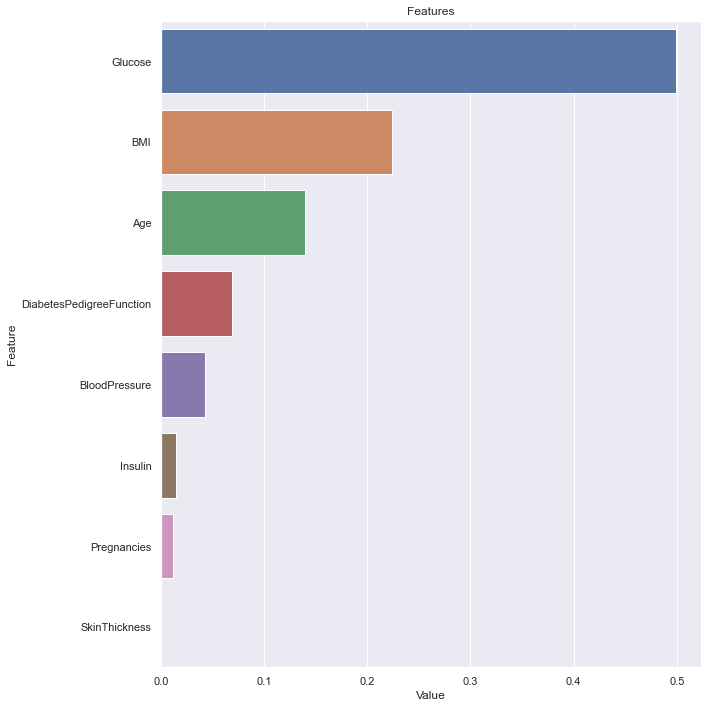

In [48]:
plot_importance(cart_final,X)

#### 7.Analyzing Model Complexity with Learning Curves(BONUS)

In [49]:
# validation_curve : bana modeli göster,bağımlı,bağımsız değişkenleri göster, numerik çıktı verir ,hangi parametreleri deneyeceksin 

train_score , test_score = validation_curve(cart_final,X,y, 
                                           param_name='max_depth', 
                                           param_range=range(1,11), 
                                           scoring="roc_auc", 
                                           cv=10)

In [50]:
train_score

array([[0.72320885, 0.72306132, 0.68555095, 0.72350392, 0.71698479,
        0.7011941 , 0.66131397, 0.71142923, 0.71549128, 0.71120294],
       [0.7987598 , 0.79874136, 0.76659751, 0.8000461 , 0.80217151,
        0.77901798, 0.76472568, 0.79175657, 0.80145087, 0.79440771],
       [0.84255417, 0.84810512, 0.82195943, 0.84559705, 0.8434532 ,
        0.81859843, 0.82218534, 0.83455048, 0.8413315 , 0.84593664],
       [0.88173813, 0.88264638, 0.85937298, 0.88757031, 0.87591056,
        0.86677271, 0.86062241, 0.87115722, 0.87093664, 0.87407713],
       [0.91389119, 0.90867681, 0.88421392, 0.9168603 , 0.90828031,
        0.89679115, 0.8790687 , 0.90533426, 0.89931129, 0.89940771],
       [0.93704933, 0.936284  , 0.90413555, 0.93538036, 0.9338497 ,
        0.92011065, 0.8945136 , 0.92968188, 0.92400367, 0.9221258 ],
       [0.95497003, 0.94939142, 0.92807746, 0.94810973, 0.95059474,
        0.93742739, 0.91884278, 0.94593822, 0.93830119, 0.93804408],
       [0.95759797, 0.95568004, 0.9444859

In [51]:
test_score

array([[0.64777778, 0.64925926, 0.68074074, 0.64481481, 0.64222222,
        0.68481481, 0.63666667, 0.75333333, 0.71692308, 0.75615385],
       [0.73407407, 0.74888889, 0.73555556, 0.71592593, 0.61703704,
        0.77777778, 0.70481481, 0.82555556, 0.74615385, 0.80038462],
       [0.78407407, 0.81333333, 0.77222222, 0.68296296, 0.69296296,
        0.82925926, 0.79259259, 0.85814815, 0.72615385, 0.80807692],
       [0.76481481, 0.81148148, 0.74962963, 0.60740741, 0.74296296,
        0.82111111, 0.83703704, 0.87333333, 0.75884615, 0.81961538],
       [0.7262963 , 0.78740741, 0.77925926, 0.5962963 , 0.74703704,
        0.84740741, 0.79777778, 0.88296296, 0.77730769, 0.80923077],
       [0.75185185, 0.75851852, 0.75333333, 0.60814815, 0.77592593,
        0.82555556, 0.85037037, 0.83185185, 0.76538462, 0.77615385],
       [0.73740741, 0.7537037 , 0.77703704, 0.62962963, 0.73814815,
        0.8137037 , 0.85703704, 0.85703704, 0.76538462, 0.78884615],
       [0.73111111, 0.74259259, 0.7796296

In [52]:
# ort alalım 

mean_train_score = np.mean(train_score, axis=1) 
mean_test_score = np.mean(test_score, axis=1)

In [53]:
mean_train_score

array([0.70729413, 0.78976751, 0.83642714, 0.87308045, 0.90118357,
       0.92371345, 0.9409697 , 0.94985091, 0.95598574, 0.96021198])

In [54]:
mean_test_score

array([0.68127066, 0.74061681, 0.77597863, 0.77862393, 0.77509829,
       0.7697094 , 0.77179345, 0.75396866, 0.74506838, 0.74446011])

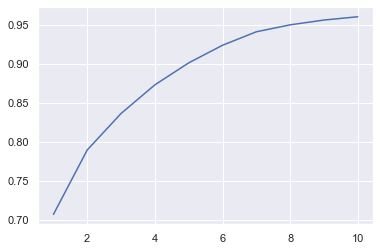

In [55]:
# train ve test seti görselleştirilir aykırılıklar gözlemlenir 

plt.plot(range(1,11),mean_train_score, 
        label = "Training Score",color ='b') 

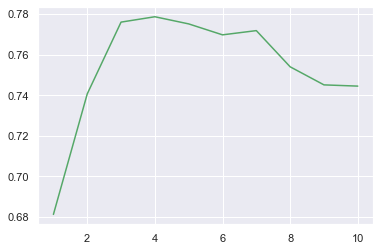

In [56]:
plt.plot(range(1,11),mean_test_score, 
        label = "Validation/Test Score",color = 'g')

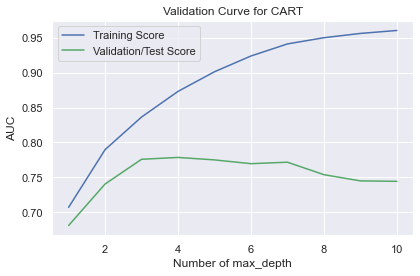

In [57]:
plt.plot(range(1,11),mean_train_score, 
        label = "Training Score",color ='b') 

plt.plot(range(1,11),mean_test_score, 
        label = "Validation/Test Score",color = 'g')

plt.title("Validation Curve for CART") 
plt.xlabel("Number of max_depth") 
plt.ylabel("AUC") 
plt.tight_layout() 
plt.legend(loc = 'best') 
plt.show()

In [58]:
# 3 den sonra test seti düşmüş train ise overfit yapmış 
# max_depth 4 dü fakat burda 3 gibi sınır 
# doğrulama açısından bunu görsel şekilde baktık  

Dipnot : 
"Veri setimiz küçük olduğunda, 80-20 olarak ayırdığımızda, bu 20 hangi 20 olacak, örneğin 500 verilik bir sette o 100 verinin ne olacağı hem train performansını hem test  performansını oldukça etkileyecektir. Bu sebepten ötürü k-katlı çapraz doğrulama bu ayrım sırasında yapılacak hataların önüne geçecektir."
tarzında bir şey söylemişti. Veri setimiz küçük olduğunda veri setini bölmek ve iki farklı set oluşturmak Örneklem Yanlılığına (sampling bias) sebep olabilir. Bunun önüne geçmek için k-katlı çapraz doğrulama en iyi çözümlerden birisi.

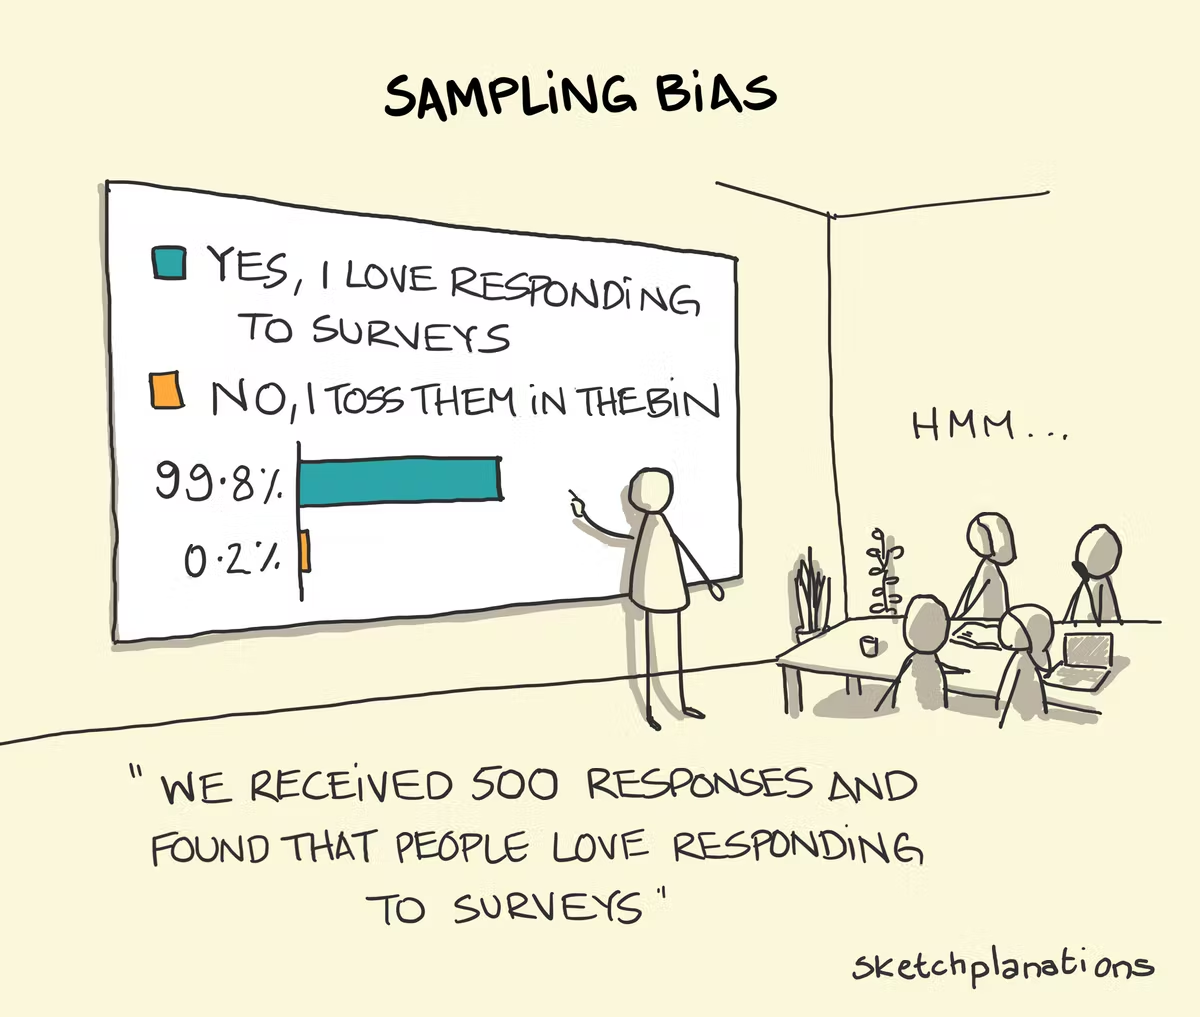

Hepsinin fonksiyonlaşmış hali

In [59]:
def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10): 
    train_score, test_score  = validation_curve( 
         model, X=X, y=y , param_name=param_name, param_range= param_range ,scoring=scoring, cv=cv) 
    
    mean_train_score = np.mean(train_score, axis=1) 
    mean_test_score  = np.mean(test_score, axis=1) 
    
    plt.plot(param_range, mean_train_score, 
             label = "Training Score", color = 'b') 
    
    plt.plot(param_range ,mean_test_score, 
            label = "Validation Score", color = 'g') 
    
    # __name__ ile modelin ismini dinamik şekilde alıyoruz
    plt.title(f"Validation Curve for {type(model).__name__}") 
    plt.xlabel(f"Number of {param_name}") 
    plt.ylabel(f"{scoring}") 
    plt.tight_layout() 
    plt.legend(loc='best') 
    plt.show()

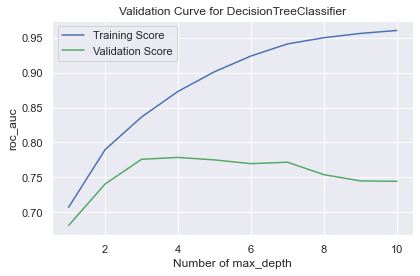

In [60]:
val_curve_params(cart_final, X, y, "max_depth", range(1,11))

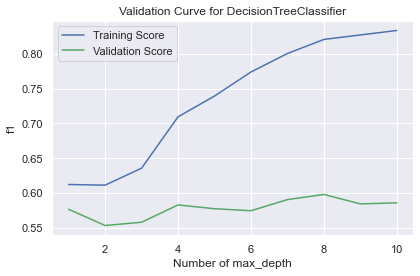

In [61]:
val_curve_params(cart_final, X, y, "max_depth", range(1,11), scoring="f1")

In [62]:
# birden fazla hiperparametre varsa 

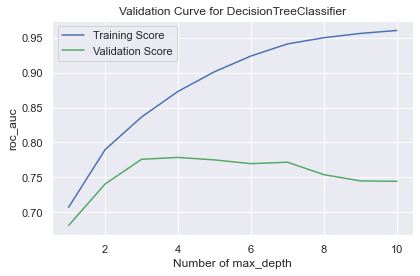

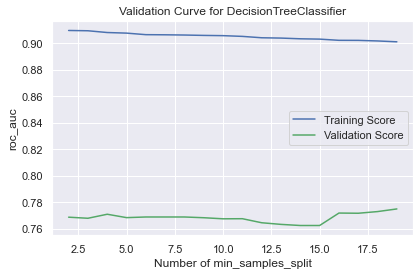

In [63]:
cart_val_params = [["max_depth",range(1,11)], ["min_samples_split",range(2,20)]]
for i in range(len(cart_val_params)): 
    val_curve_params(cart_model, X, y, cart_val_params[i][0], cart_val_params[i][1])

#### 8. Visualizing the Decision Tree

In [82]:
!pip install graphviz

In [83]:
!conda install grahviz

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.



PackagesNotFoundError: The following packages are not available from current channels:

  - grahviz

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [64]:
from graphviz import Digraph
import pydotplus

In [86]:
 !pip install pygraphviz

  Using cached pygraphviz-1.9.zip (119 kB)
  Running setup.py clean for pygraphviz
Failed to build pygraphviz
    Running setup.py install for pygraphviz: started
    Running setup.py install for pygraphviz: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\tolga\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\tolga\\AppData\\Local\\Temp\\pip-install-50u7wjhu\\pygraphviz_475ea40e7bb14b818b2e90751511d5f0\\setup.py'"'"'; __file__='"'"'C:\\Users\\tolga\\AppData\\Local\\Temp\\pip-install-50u7wjhu\\pygraphviz_475ea40e7bb14b818b2e90751511d5f0\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\tolga\AppData\Local\Temp\pip-wheel-hva2p8ml'
       cwd: C:\Users\tolga\AppData\Local\Temp\pip-install-50u7wjhu\pygraphviz_475ea40e7bb14b818b2e90751511d5f0\
  Complete output (48 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-

In [87]:
conda install -c conda-forge pydotplus

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [65]:
def tree_graph(model, col_names, file_name): 
    tree_str = export_graphviz(model, feature_names=col_names, filled=True, out_file = None) 
    graph = pydotplus.graph_from_dot_data(tree_str) 
    graph.write_png(file_name)

In [66]:
tree_graph(model=cart_final, col_names=X.columns, file_name="cart_final.png")

In [67]:
cart_final.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 19,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 17,
 'splitter': 'best'}

In [68]:
# max_depth : 5 -> 5 tane dallanma işlemi olmuştur 

In [69]:
# ödev: max_depth 2 ye çekebilirsin, gini değerlerini el ile hesapla ,entropiyi de değiştir

#### 9. Extracting Decision Rules

In [70]:
tree_rules = export_text(cart_final, feature_names=list(X.columns))

In [71]:
print(tree_rules)

|--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- BMI <= 45.40
|   |   |   |--- BMI <= 30.95
|   |   |   |   |--- Pregnancies <= 7.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Pregnancies >  7.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- BMI >  30.95
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- DiabetesPedigreeFunction >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- BMI >  45.40
|   |   |   |--- class: 1
|   |--- Age >  28.50
|   |   |--- BMI <= 26.35
|   |   |   |--- BMI <= 9.65
|   |   |   |   |--- class: 1
|   |   |   |--- BMI >  9.65
|   |   |   |   |--- class: 0
|   |   |--- BMI >  26.35
|   |   |   |--- Glucose <= 99.50
|   |   |   |   |--- Glucose <= 28.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Glucose >  28.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Glucose >  99.50
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.56
|   |   |   |   |   |--- class: 0

#### 10.Extracting Python Codes of Decision Rules 

In [72]:
!pip install scikit-learn==0.23.1

  Using cached scikit-learn-0.23.1.tar.gz (7.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\tolga\anaconda3\python.exe' 'C:\Users\tolga\AppData\Local\Temp\pip-standalone-pip-eyqntzwr\__env_pip__.zip\pip' install --ignore-installed --no-user --prefix 'C:\Users\tolga\AppData\Local\Temp\pip-build-env-3gkk8co4\overlay' --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- setuptools wheel 'Cython>=0.28.5' 'numpy==1.13.3; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"' and platform_python_implementation == '"'"'CPython'"'"'' 'numpy==1.14.0; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"' and platform_python_implementation != '"'"'CPython'"'"'' 'numpy==1.14.5; python_version=='"'"'3.7'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.17.3; python_version>='"'"'3.8'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.6'"'"' and platform_system=='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.7'"'"' and pl

In [98]:
!pip install SKompiler

In [99]:
# canlı sisteme entegre etmek istiyoruz 
# sunucudan çıkmadan problemi çözüyor olmak en önemli yöntemlerden biridir 
# bir script olarak sql olarak çalıştırmak "veri tabanı"da yapmalıyız 

In [73]:
import sklearn

In [74]:
sklearn.__version__

'1.0.2'

In [75]:
!pip install astor

In [76]:
from skompiler import skompile

In [77]:
print(skompile(cart_final.predict).to('python/code'))

(((((0 if x[0] <= 7.5 else 1) if x[5] <= 30.949999809265137 else 0 if x[6] <=
    0.5005000084638596 else 0) if x[5] <= 45.39999961853027 else 1) if x[7] <=
    28.5 else (1 if x[5] <= 9.649999618530273 else 0) if x[5] <= 
    26.350000381469727 else (1 if x[1] <= 28.5 else 0) if x[1] <= 99.5 else
    0 if x[6] <= 0.5609999895095825 else 1) if x[1] <= 127.5 else (((0 if x
    [5] <= 28.149999618530273 else 1) if x[4] <= 132.5 else 0) if x[1] <= 
    145.5 else 0 if x[7] <= 25.5 else 1 if x[7] <= 61.0 else 0) if x[5] <= 
    29.949999809265137 else ((1 if x[2] <= 61.0 else 0) if x[7] <= 30.5 else
    1 if x[6] <= 0.4294999986886978 else 1) if x[1] <= 157.5 else (1 if x[6
    ] <= 0.3004999905824661 else 1) if x[4] <= 629.5 else 0)



In [78]:
print(skompile(cart_model.predict).to('sqlalchemy/sqlite'))

SELECT CASE WHEN (x2 <= 127.5) THEN CASE WHEN (x8 <= 28.5) THEN CASE WHEN (x6 <= 45.39999961853027) THEN CASE WHEN (x6 <= 30.949999809265137) THEN CASE WHEN (x1 <= 7.5) THEN 0 ELSE 1 END ELSE 0 END ELSE 1 END ELSE CASE WHEN (x6 <= 26.350000381469727) THEN CASE WHEN (x6 <= 9.649999618530273) THEN 1 ELSE 0 END ELSE CASE WHEN (x2 <= 99.5) THEN CASE WHEN (x2 <= 28.5) THEN 1 ELSE 0 END ELSE CASE WHEN (x7 <= 0.5609999895095825) THEN 0 ELSE 1 END END END END ELSE CASE WHEN (x6 <= 29.949999809265137) THEN CASE WHEN (x2 <= 145.5) THEN CASE WHEN (x5 <= 132.5) THEN CASE WHEN (x6 <= 28.149999618530273) THEN 0 ELSE 1 END ELSE 0 END ELSE CASE WHEN (x8 <= 25.5) THEN 0 ELSE CASE WHEN (x8 <= 61.0) THEN 1 ELSE 0 END END END ELSE CASE WHEN (x2 <= 157.5) THEN CASE WHEN (x8 <= 30.5) THEN CASE WHEN (x3 <= 61.0) THEN 1 ELSE 0 END ELSE 1 END ELSE CASE WHEN (x5 <= 629.5) THEN 1 ELSE 0 END END END END AS y 
FROM data


In [79]:
print(skompile(cart_final.predict).to('excel'))

A1=IF((x2<=127.5),IF((x ...401 chars skipped... ((x5<=629.5),1,0))))


In [80]:
# bir özellik arıyoruz diyelim  skompile olarak aratırız dökümanda vs

In [81]:
"""
A convenience interface to SKompiler's functionality.
Wraps around the intricacies of the various toskast/fromskast pieces.
"""


def skompile(*args, inputs=None):
    """
    Creates a SKAST expression from a given bound method of a fitted SKLearn model.
    A shorthand notation for SKompiledModel(method, inputs)
    Args:
        args:  Either a bound method of a trained model (e.g. skompile(model.predict_proba)),
               OR two arguments - a model and a method name (e.g. skompile(model, 'predict_proba')
               (which may be necessary for some models where the first option cannot be used due to metaclasses)
        
        inputs:  A string or a list of strings, or a SKAST node or a list of SKAST nodes,
                 denoting the input variable(s) to your model.
                 A single string corresponds to a vector variable (which will be indexed to access
                 the components). A list of strings corresponds to a vector with separately named components.
               You may pass the inputs as a non-keyword argument as well (the last one in *args)
               If not specified, the default value of 'x' is used.
    
    Returns:
        An instance of SKompiledModel.
    Examples:
        >>> from sklearn.datasets import load_iris
        >>> from sklearn.linear_model import LogisticRegression
        >>> X, y = load_iris(True)
        >>> m = LogisticRegression().fit(X, y)
        >>> print(skompile(m.predict))
        argmax((([[...]] m@v x) + [ ...]))
        >>> print(skompile(m, 'predict'))
        argmax((([[...]] m@v x) + [ ...]))
        >>> print(skompile(m.predict, 'y'))
        argmax((([[...]] m@v y) + [ ...]))
        >>> print(skompile(m.predict, ['x','y','z','w']))
        argmax((([[...]] m@v [x, y, z, w]) + [ ...]))
        >>> print(skompile(m, 'predict', 'y'))
        argmax((([[...]] m@v y) + [ ...]))
        >>> print(skompile(m, 'predict', ['x','y','z','w']))
        argmax((([[...]] m@v [x, y, z, w]) + [ ...]))
        >>> from skompiler.ast import VectorIdentifier, Identifier
        >>> print(skompile(m, 'predict', VectorIdentifier('y', 4)))
        argmax((([[...]] m@v y) + [ ...]))
        >>> print(skompile(m, 'predict', map(Identifier, ['x','y','z','w'])))
        argmax((([[...]] m@v [x, y, z, w]) + [ ...]))
        >>> from sklearn.pipeline import Pipeline
        >>> p = Pipeline([('1', m)])
        >>> skompile(p.predict)
        Traceback (most recent call last):
        ...
        ValueError: The bound method ... Please, use the skompile(m, 'predict') syntax instead.
    """

    if len(args) > 3:
        raise ValueError("Too many arguments")
    elif not args:
        raise ValueError("Invalid arguments")
    elif len(args) == 3:
        if inputs is not None:
            raise ValueError("Too many arguments")
        model, method, inputs = args
    elif len(args) == 2:
        if hasattr(args[0], '__call__'):
            model, method = _get_model_and_method(args[0])
            inputs = args[1]
        else:
            model, method = args
    else:
        model, method = _get_model_and_method(args[0])
    if not inputs:
        inputs = 'x'
    return _translate(model, inputs, method)

def _translate(model, inputs, method):
    if model.__class__.__module__.startswith('keras.'):
        if method != 'predict':
            raise ValueError("Only the 'predict' method is supported for Keras models")
        # Import here, this way we do not force everyone to install everything
        from .toskast.keras import translate as from_keras
        return from_keras(model, inputs)
    else:
        from .toskast.sklearn import translate as from_sklearn
        return from_sklearn(model, inputs=inputs, method=method)

def _get_model_and_method(obj):
    if not hasattr(obj, '__call__'):
        raise ValueError("Please, provide a method to compile.")
    if not hasattr(obj, '__self__'):
        raise ValueError("The bound method object was probably mangled by "
                         "SKLearn's metaclasses and cannot be passed to skompile as skompile(m.predict). "
                         "Please, use the skompile(m, 'predict') syntax instead.")
    return obj.__self__, obj.__name__

#### 11. Prediction using Python Codes

In [82]:
def predict_with_rules(x): 
    return (((((0 if x[0] <= 7.5 else 1) if x[5] <= 30.949999809265137 else 0 if x[6] <=
    0.5005000084638596 else 0) if x[5] <= 45.39999961853027 else 1) if x[7] <=
    28.5 else (1 if x[5] <= 9.649999618530273 else 0) if x[5] <= 
    26.350000381469727 else (1 if x[1] <= 28.5 else 0) if x[1] <= 99.5 else
    0 if x[6] <= 0.5609999895095825 else 1) if x[1] <= 127.5 else (((0 if x
    [5] <= 28.149999618530273 else 1) if x[4] <= 132.5 else 0) if x[1] <= 
    145.5 else 0 if x[7] <= 25.5 else 1 if x[7] <= 61.0 else 0) if x[5] <= 
    29.949999809265137 else ((1 if x[2] <= 61.0 else 0) if x[7] <= 30.5 else
    1 if x[6] <= 0.4294999986886978 else 1) if x[1] <= 157.5 else (1 if x[6
    ] <= 0.3004999905824661 else 1) if x[4] <= 629.5 else 0)


In [83]:
# fonksiyonları tanımla 
X.columns 

x = [12,13,20,23,4,55,12,7] 

predict_with_rules(x)

1

In [84]:
x = [6,148,70,35,0,30,0.62,50]

In [85]:
predict_with_rules(x)

1

#### 12. Saving and Loading Model 

In [86]:
# öyle bir şey yapalım ki final model nesnesini sakliyim ve sonra kullanabileyim

In [87]:
!pip install joblib

In [88]:
from joblib import Memory

In [90]:
cart_model_from_disc = joblib.dump(cart_final, "cart_final.pkl")

In [96]:
cart_model_from_disc

['cart_final.pkl']

In [105]:
cart_model_from_disc = joblib.load("cart_final.pkl")

In [106]:
x = [12,13,20,23,4,55,12,7]

In [107]:
cart_model_from_disc.predict(pd.DataFrame(x).T)

array([1], dtype=int64)